In [1]:
import matplotlib.pyplot as pl
import pandas as pd
import rules.enzymes_v04 as enz
enzymes = [item for item in dir(enz) if not item.startswith("__")]

pl.rcParams["font.family"] = "sans-serif"
pl.rcParams["font.size"] = 10

In [2]:
reports = ['v04_Rac1_dominant', 
           'v04_RhoA_dominant',
           'v04_equal_oscillations']

In [34]:
def plot_knockdowns(dataframe, ax, title, maxn):
    colors = ['#1f77b4', '#ff7f0e']
    ax = dataframe.plot.bar(width=0.8, color=colors, ax=ax)
    ax.legend(loc='lower right', bbox_to_anchor=(0.97, 1.0), ncol=2, 
              frameon=False, borderpad=0, borderaxespad=0,
              prop={'size':10})

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('left')

    ax.set_ylim(top=100)
    ax.set_ylabel('Weighted activity, %')
    ax.set_xlim(-0.5, maxn-0.5)
    ax.set_title(title, loc='left', x=0.03)
    br, st = dataframe.loc['base']

    ax.plot([-1, 100], [br, br], linewidth=1, linestyle='--', color=colors[0])
    ax.plot([-1, 100], [st, st], linewidth=1, linestyle='--', color=colors[1])

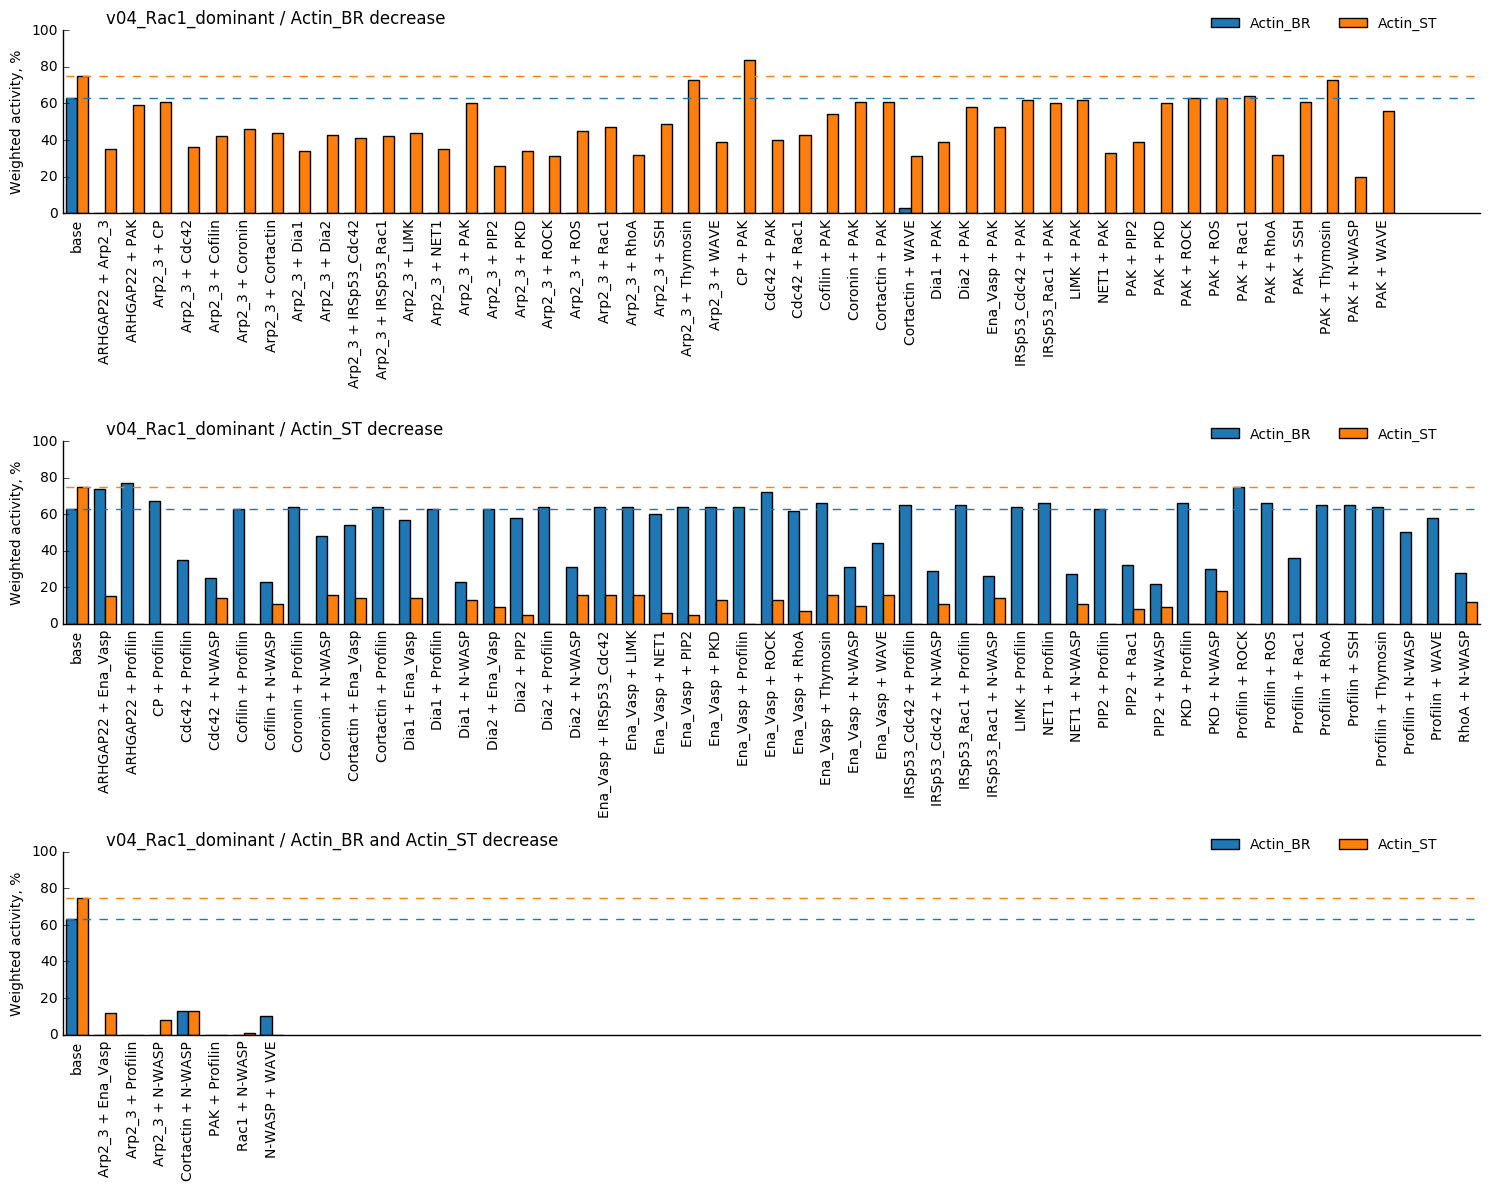

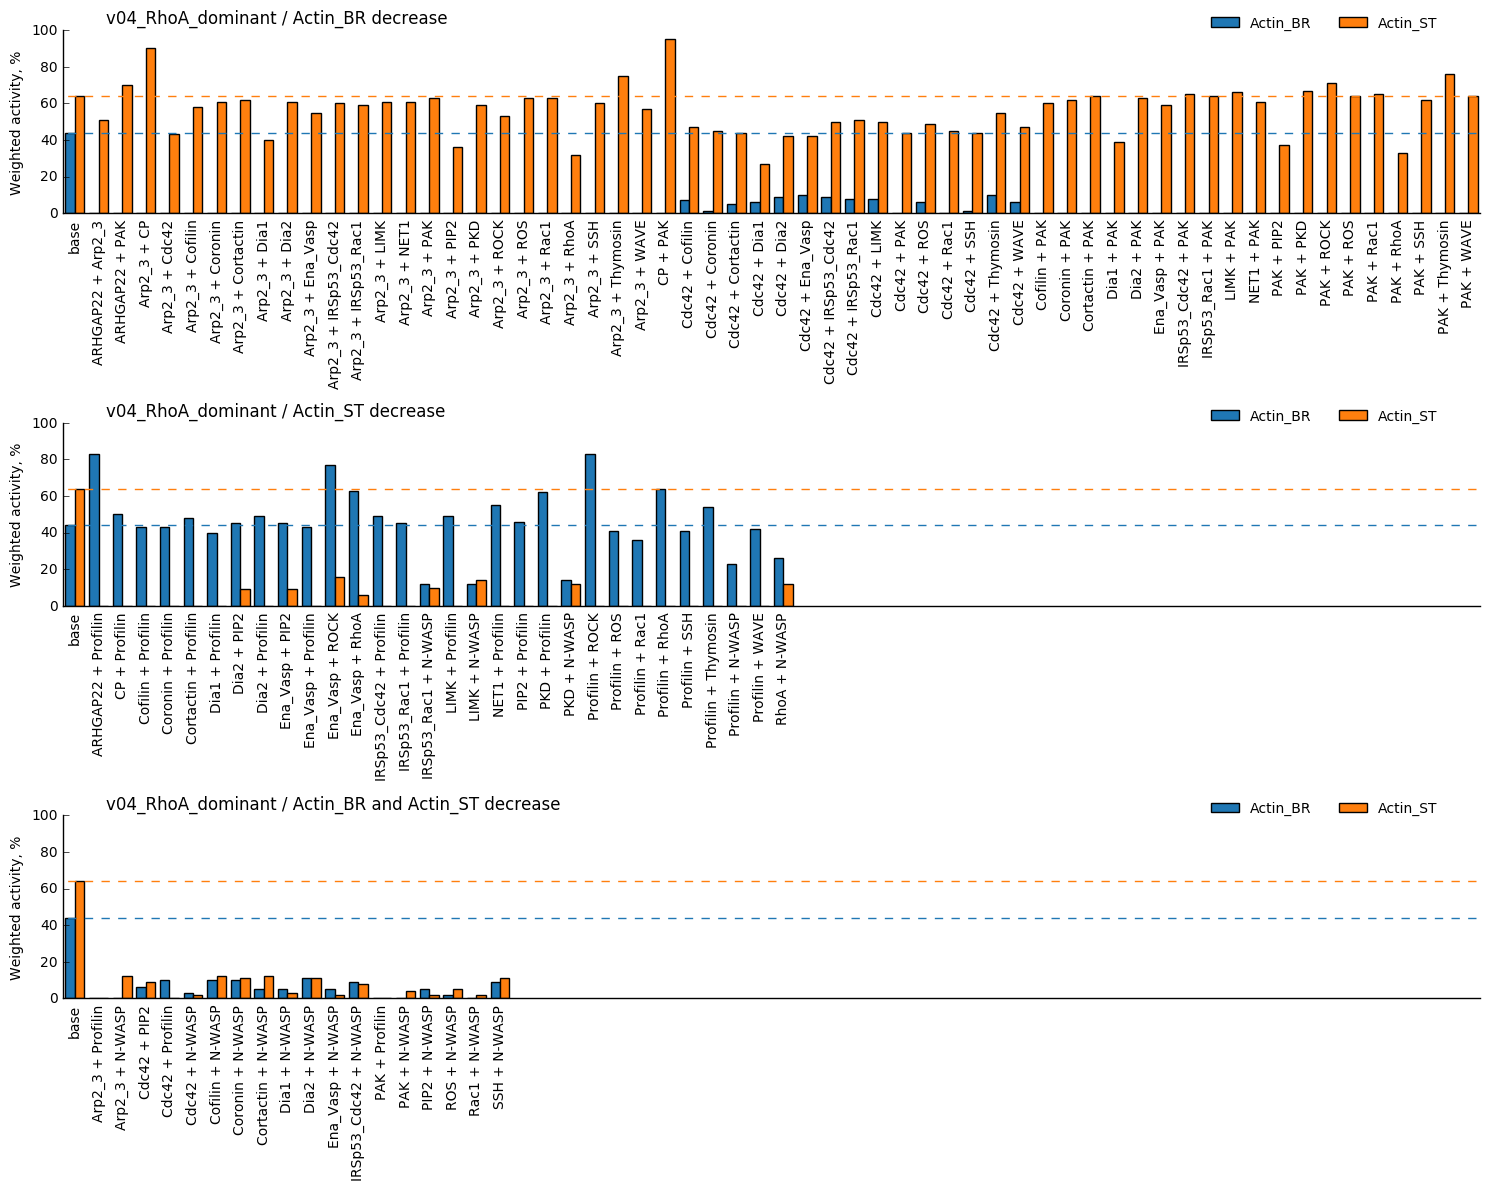

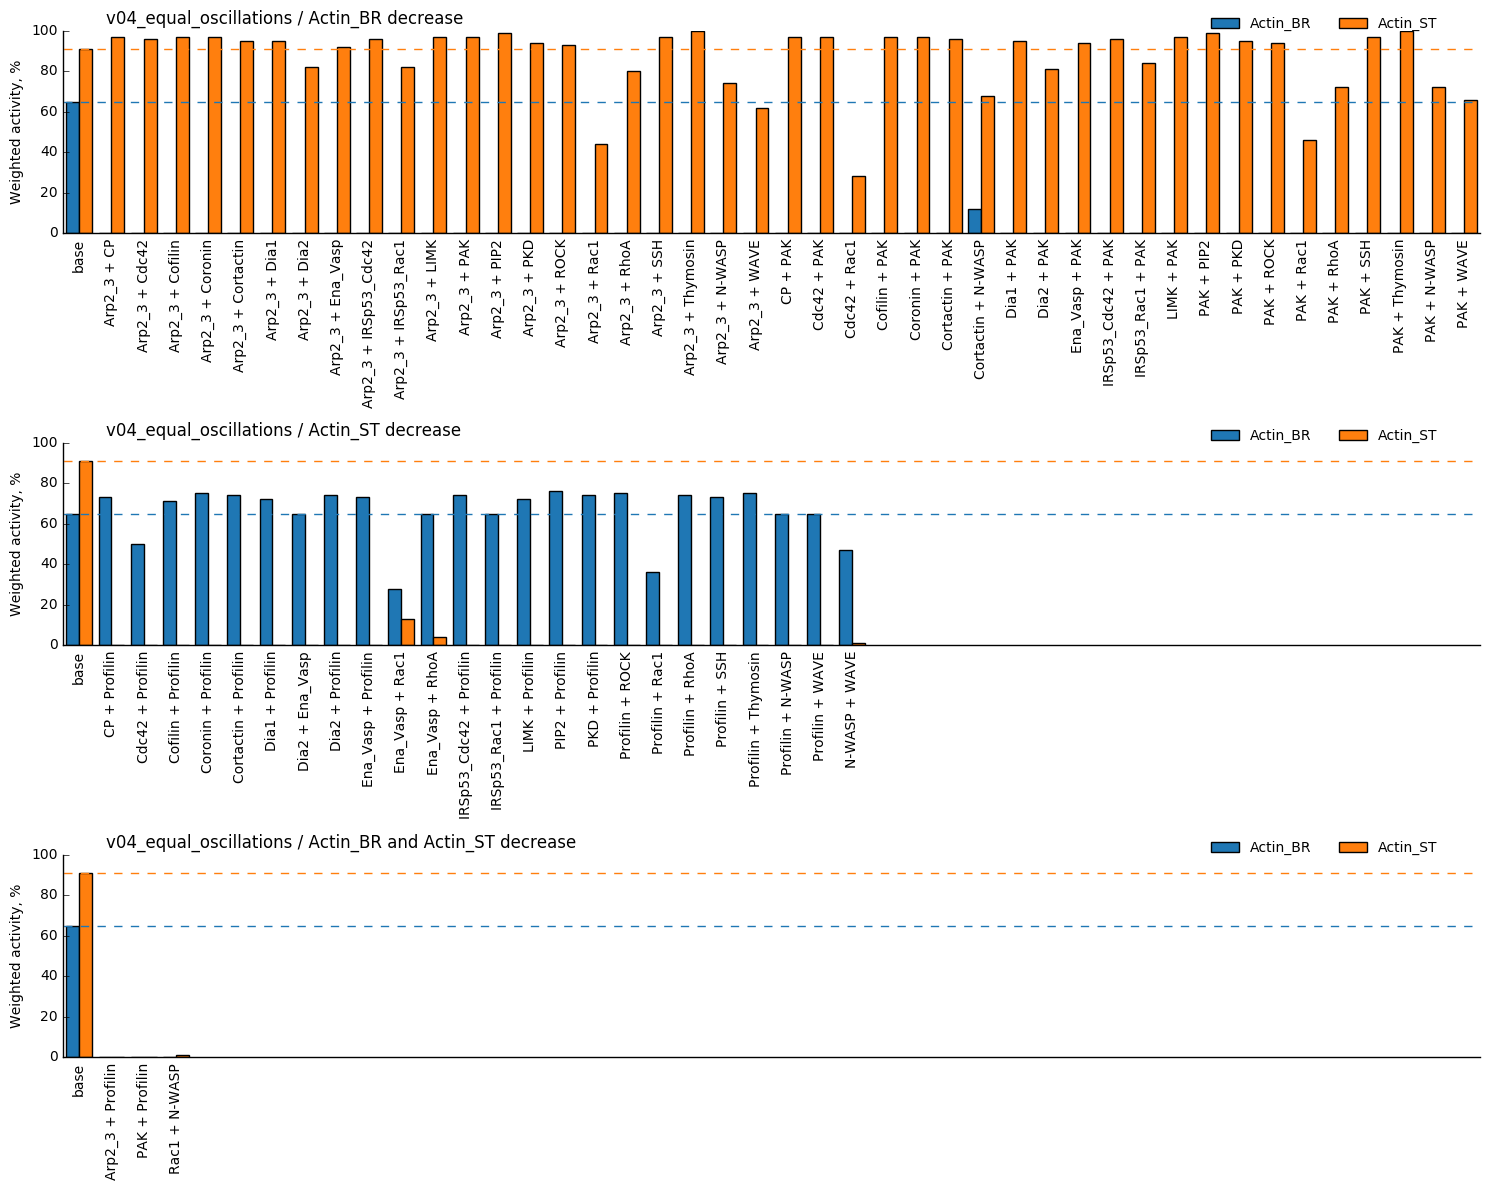

In [39]:
threshold = 1 - 0.75

for report in reports:
    df = pd.read_csv('reports/{}/summary.csv'.format(report), index_col=0)
    df = df.filter(regex='^(base|({0})_({0}))$'.format('|'.join(enzymes))).loc[[enz.Actin_BR, enz.Actin_ST]]
    df.columns = df.columns.str.replace(r'^({0})_({0})$'.format('|'.join(enzymes)), r'\g<1> + \g<2>').str.replace('WASP', 'N-WASP')
    df = df.transpose()

    base_BR = df['Actin_BR']['base']
    base_ST = df['Actin_ST']['base']

    fig, axis = pl.subplots(3, 1, sharey=True, figsize=(15, 12))

    dfs = [
        df[(df.index == 'base') | ((df['Actin_BR'] / base_BR <= threshold) & (df['Actin_ST'] / base_ST > threshold))],
        df[(df.index == 'base') | ((df['Actin_BR'] / base_BR > threshold) & (df['Actin_ST'] / base_ST <= threshold))],
        df[(df.index == 'base') | ((df['Actin_BR'] / base_BR <= threshold) & (df['Actin_ST'] / base_ST <= threshold))]
    ]

    names = ['Actin_BR decrease', 'Actin_ST decrease', 'Actin_BR and Actin_ST decrease']

    maxn = max([len(d) for d in dfs])

    for i in range(3):
        plot_knockdowns(dfs[i], axis[i], report + ' / '+ names[i], maxn)

    pl.tight_layout()

    pl.savefig('charts/fig_4_{}.png'.format(report), bbox_inches='tight', dpi=300)
    pl.savefig('charts/fig_4_{}.svg'.format(report), bbox_inches='tight')
